### Importando as bibliotecas

In [ ]:
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

### Carregando a base de dados

In [ ]:
import kagglehub

# Download úiltima versão do Dataset
path = kagglehub.dataset_download("fawadhossaini1415/amazon-fashion-800k-user-reviews-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'amazon-fashion-800k-user-reviews-dataset' dataset.
Path to dataset files: /kaggle/input/amazon-fashion-800k-user-reviews-dataset


In [ ]:
import os

print(path)
print(os.listdir(path))

/kaggle/input/amazon-fashion-800k-user-reviews-dataset
['amazon-fashion-800k+-user-reviews-dataset.csv']


In [ ]:
csv_file = os.path.join(path, 'amazon-fashion-800k+-user-reviews-dataset.csv')

try:
  df = pd.read_csv(csv_file, encoding="utf-8", low_memory=False)
except:
    try:
        df = pd.read_csv(csv_file, encoding='latin1')
    except:
        df = pd.read_csv(csv_file, encoding='iso-8859-1')
df.head()

,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchases,target
0,1.0,It say 5 pair when purchasing but only get 2 r...,I was looking for 5 pair and only received 2 p...,[],B07QFTMTLP,B07QFTMTLP,AHASEZ65RESN57BMGRV6QBM5DTIA,1565088068852,0,True,-1
1,1.0,DonÃ¢ÂÂt do it!,Just donÃ¢ÂÂt. These things fell apart after...,[],B0764KKDN1,B0764KKDN1,AE3AMA3QSOHFKV46JJAHTHMMIR6A,1622416429592,0,True,-1
2,1.0,Small,Retuned is too small for me,[],B07J1WHVCP,B07J1WHVCP,AH4CFWQE2HTC5BSWIEF3LVLUFK6A,1565284666220,0,True,-1
3,1.0,Pre-Used When Received,This product came with the sleeves turned insi...,[],B0773JWP64,B0773JWP64,AFEKQFJWST6MVTKEJBQKUUBTWK7A,1581963636172,0,False,-1
4,1.0,Worn once and several places at seams have com...,Worn once and several places at seams have com...,[],B099NST9RX,B08JGNS1NK,AGU2FPKN6ARXUSSGBT6WTVLZKJSQ,1640895438476,0,True,-1


### Analise inicial

In [ ]:
print("Dimensão:", df.shape)
df.info()
df.describe(include="all")
df.sample(5)

Dimensão: (867310, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 867310 entries, 0 to 867309
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   rating              867310 non-null  float64
 1   title               867107 non-null  object 
 2   text                867012 non-null  object 
 3   images              867310 non-null  object 
 4   asin                867310 non-null  object 
 5   parent_asin         867310 non-null  object 
 6   user_id             867310 non-null  object 
 7   timestamp           867310 non-null  int64  
 8   helpful_vote        867310 non-null  int64  
 9   verified_purchases  867310 non-null  bool   
 10  target              867310 non-null  int64  
dtypes: bool(1), float64(1), int64(3), object(6)
memory usage: 67.0+ MB


,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchases,target
752453,5.0,Good and comfortable,Great easy summer dress,[],B01N7ENTFR,B01N7ENTFR,AERYYK5PTZ3KSD6TK6B36LUXILHA,1562961382780,0,True,1
528795,4.0,Very nice rose quartz pendant necklace,Are there any nice necklace. Very well made. D...,[],B07YS48MNG,B07YS48MNG,AEJXW7SCFCOV3QC7QVUZRZ5T5XTA,1600834158097,0,False,1
170370,1.0,One Star,Was damaged wen arrived Ã°ÂÂÂ¢,[],B06XB781KQ,B06XB781KQ,AFPNUIACMTEBC3QYLJU2ELKJEIBA,1515653887957,0,True,-1
8768,1.0,Doesn't Fit Samsung Galaxy watches.,No idea why this description includes Galaxy i...,[],B07QWJ6B83,B07QWJ6B83,AGW3U7G4EIHBOMZYAIFA3L5Z5SKQ,1562443460905,0,True,-1
263625,2.0,"Good hat, poor embroidery.",Very high quality hat.<br />Very poor quality ...,[],B00VIQBA36,B00VIQBA36,AELMSDJ4KVOYGOB3VJOKQYNIOEOA,1442658075000,0,True,-1


### Selecionar apenas colunas úteis


In [ ]:
df = df[['rating', 'title', 'text']]

### Análise depois de selecionar as colunas

In [ ]:
print("Dimensão:", df.shape)
df.info()
df.describe(include="all")
df.sample(5)

Dimensão: (867310, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 867310 entries, 0 to 867309
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   rating  867310 non-null  float64
 1   title   867107 non-null  object 
 2   text    867012 non-null  object 
dtypes: float64(1), object(2)
memory usage: 19.9+ MB


,rating,title,text
288853,2.0,Not spring hinge,These are decent glasses and get the job done ...
61633,1.0,Nice top,The top does run a little big. I really loved...
420271,3.0,Three Stars,"Obviously cheap, very thin, but decent for wha..."
88738,1.0,dont waste your,"Cheap quality, dont waste your money"
666332,4.0,Nice Chains,Recieved 4 chains. All look as seller represen...


### Análise Exploratória de Dados

- Quantidades de valores nulos ordenados

- Quantas linhas ou textos estão duplicados.

- Se existem ratings fora do padrão (ex.: 6, 0, negativo).

- Se há textos vazios, muito curtos ou ruidosos.

- Se os textos possuem emojis, caracteres especiais, URLs ou ruído digital.

- Distribuição do rating (útil para criação posterior da coluna de sentimento).




In [ ]:
# Quantidade de valores nulos ordenados do maior para o menor
df.isna().sum().sort_values(ascending=False)

,0
text,298
title,203
rating,0


- Verificar duplicidades

In [ ]:
# Conta quantas linhas são duplicadas considerando todas as colunas
duplicatas = df.duplicated().sum()
print("Total de linhas duplicadas:", duplicatas)

Total de linhas duplicadas: 26881


In [ ]:
# Conta duplicidades considerando somente o texto do review
duplicatas_texto = df['text'].duplicated().sum()
print("Total de textos duplicados:", duplicatas_texto)

Total de textos duplicados: 56608


- Verificar valores inconsistentes

In [ ]:
# Verifica valores únicos de rating
print("Valores únicos de rating:")
print(df['rating'].unique())

Valores únicos de rating:
[1. 2. 3. 4. 5.]


In [ ]:
# Verifica estatísticas básicas do rating
print(df['rating'].describe())

count    867310.000000
mean          3.000000
std           1.414214
min           1.000000
25%           2.000000
50%           3.000000
75%           4.000000
max           5.000000
Name: rating, dtype: float64


In [ ]:
# Procura textos extremamente curtos (possível ruído)
df['text_length'] = df['text'].astype(str).apply(len)
print("\nDistribuição do tamanho dos textos:")
print(df['text_length'].describe())


Distribuição do tamanho dos textos:
count    867310.000000
mean        158.297295
std         196.318998
min           1.000000
25%          47.000000
50%         102.000000
75%         199.000000
max       14382.000000
Name: text_length, dtype: float64


In [ ]:
# Exibe 5 exemplos de textos com menos de 5 caracteres
curtos = df[df['text_length'] < 5][['text', 'rating']]
print("\nTextos muito curtos (possível ruído):")
print(curtos.head())


Textos muito curtos (possível ruído):
      text  rating
39     Ugh     1.0
309   Junk     1.0
688   Huge     1.0
1167    No     1.0
1291  Ruim     1.0


- Distribuição da variável rating

In [ ]:
print("\nDistribuição do rating:")
print(df['rating'].value_counts().sort_index())


Distribuição do rating:
rating
1.0    173462
2.0    173462
3.0    173462
4.0    173462
5.0    173462
Name: count, dtype: int64


- Verificar presença de emojis ou caracteres não ascii

In [ ]:
def contem_caracteres_especiais(texto):
    return bool(re.search(r'[^\x00-\x7F]', str(texto)))

df['caracteres_especiais'] = df['text'].apply(contem_caracteres_especiais)

print("\nQuantidade de textos com caracteres especiais ou emojis:")
print(df['caracteres_especiais'].sum())


Quantidade de textos com caracteres especiais ou emojis:
108443


-  Detectar presença de URLs dentro dos textos

In [ ]:
def contem_url(texto):
    return bool(re.search(r'http\S+|www\.\S+', str(texto)))

df['tem_url'] = df['text'].apply(contem_url)

print("\nQuantidade de textos contendo URLs:")
print(df['tem_url'].sum())


Quantidade de textos contendo URLs:
186


### Limpeza
- Remover duplicidades

- Remover textos vazios ou curtos demais

- Remover URLs

- Normalizar texto (lowercase, espaços, caracteres especiais)

- Remover emojis e símbolos opcionais

- Criar um dataframe limpo para usar no modelo depois

### Remover duplicidades

In [ ]:
# Remove duplicidades considerando todas as colunas
df = df.drop_duplicates()

# Remove duplicidades considerando só o texto (review)
df = df.drop_duplicates(subset=['text'])

- Remover textos vazios ou muito curtos

In [ ]:
# Preenche valores nulos no texto com string vazia
df['text'] = df['text'].fillna("")

# Calcula tamanho dos textos
df['text_length'] = df['text'].astype(str).apply(len)

# Mantém apenas textos com mais de 5 caracteres (ajustável)
df = df[df['text_length'] > 5]

- Função para remover URLs dos textos

In [ ]:
def remove_urls(text):
    return re.sub(r'http\S+|www\.\S+', '', text)

df['text'] = df['text'].apply(remove_urls)

- Normalizar texto (lowercase + remover múltiplos espaços)


In [ ]:
def normalizar(text):
    # transforma em minúsculas
    text = text.lower()
    # remove múltiplos espaços
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df['text'] = df['text'].apply(normalizar)

- Remover emojis e caracteres especiais (opcional)

In [ ]:
def remove_emoji(text):
    emoji_pattern = re.compile(
        "["
        "\U0001F600-\U0001F64F"  # emoticons
        "\U0001F300-\U0001F5FF"  # símbolos e pictogramas
        "\U0001F680-\U0001F6FF"  # transportes e símbolos
        "\U0001F1E0-\U0001F1FF"  # bandeiras
        "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

df['text'] = df['text'].apply(remove_emoji)

- Criar dataframe final de texto limpo

In [ ]:
df = df[['rating', 'title', 'text']].reset_index(drop=True)

- Salvar versão limpa

In [ ]:
df.to_csv('./tabela_limpa_para_analise.csv', index=False)

print("Limpeza concluída. Primeiras linhas da nova base:")
df.head()

Limpeza concluída. Primeiras linhas da nova base:


,rating,title,text
0,1.0,It say 5 pair when purchasing but only get 2 r...,i was looking for 5 pair and only received 2 p...
1,1.0,DonÃ¢ÂÂt do it!,just donã¢âât. these things fell apart after...
2,1.0,Small,retuned is too small for me
3,1.0,Pre-Used When Received,this product came with the sleeves turned insi...
4,1.0,Worn once and several places at seams have com...,worn once and several places at seams have com...


In [ ]:
print("Dimensão:", df.shape)
df.info()
df.describe(include="all")
df.sample(5)

Dimensão: (809845, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 809845 entries, 0 to 809844
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   rating  809845 non-null  float64
 1   title   809733 non-null  object 
 2   text    809845 non-null  object 
dtypes: float64(1), object(2)
memory usage: 18.5+ MB


,rating,title,text
211,1.0,Not long lasting,the tips did not last long in my shoe. i was d...
280176,2.0,Not for the BBW,"if you are full-figured with hips and ass, for..."
108366,1.0,"Pretty, but wrong. Also a little large.",recieved this beautiful dark blue pendant neck...
597640,4.0,Perfect when you need something on your arms!,this is a beautiful lightweight cardigan by la...
586105,4.0,Cute Lounging,feels very lightweight and comfortable. cute a...


### Selecionando o texto e criando um rótulo de sentimentos baseado nas avaliações(Coluna Rating)

Converte valores de rating (1 a 5) para categorias de sentimento:

- 4 e 5 estrelas -> Positivo
- 3 estrelas -> Neutro
- 1 e 2 estrelas -> Negativo

In [ ]:
# Criar função para rotular sentimentos

def gerar_sentimento(rating):
  if rating >= 4:
    return "Positive"
  elif rating ==3:
    return "Neutral"
  else:
    return "Negative"

# Aplicar aos dados
df['sentiment'] = df['rating'].apply(gerar_sentimento)

# Visualizar distribuição
df['sentiment'].value_counts()

,count
sentiment,
Negative,329675
Positive,315138
Neutral,165032


In [ ]:
print("Dimensão:", df.shape)
df.info()
df.describe(include="all")
df.sample(5)

Dimensão: (809845, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 809845 entries, 0 to 809844
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   rating     809845 non-null  float64
 1   title      809733 non-null  object 
 2   text       809845 non-null  object 
 3   sentiment  809845 non-null  object 
dtypes: float64(1), object(3)
memory usage: 24.7+ MB


,rating,title,text,sentiment
450239,3.0,Colors aren't as bright as photo,didn't wear it just didn't have the look i wan...,Neutral
166019,2.0,Two Stars,not really at all like the photo.. kinda disap...,Negative
626216,4.0,"Okay Gloves, Okay Value",we go through a lot of gloves in our workshop ...,Positive
322923,2.0,Love the color just wish it didn't unhook and ...,band keeps coming off. love the color just wis...,Negative
205999,2.0,Fit is more of a brief than a boxer-brief.,5mayi mens boxer briefs pack of 6 wide waistba...,Negative


### Preparação dos Dados + Separação Treino/Teste


- Criar a coluna full_review para combinar title + text aumenta a qualidade de modelo, pois o título geralmente contém informação relevante.

In [ ]:
# Criando uma coluna combinada título e texto
df['full_review'] = df['title'].astype(str) + " " + df['text'].astype(str)

In [ ]:
print("Dimensão:", df.shape)
df.info()
df.describe(include="all")
df.sample(5)

Dimensão: (809845, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 809845 entries, 0 to 809844
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   rating       809845 non-null  float64
 1   title        809733 non-null  object 
 2   text         809845 non-null  object 
 3   sentiment    809845 non-null  object 
 4   full_review  809845 non-null  object 
dtypes: float64(1), object(4)
memory usage: 30.9+ MB


,rating,title,text,sentiment,full_review
417974,3.0,Three Stars,i would not recommend,Neutral,Three Stars i would not recommend
75051,1.0,Terrible!,i ordered this shirt before and loved it until...,Negative,Terrible! i ordered this shirt before and love...
735619,5.0,Great long tank,i bought this item to wear with leggings and a...,Positive,Great long tank i bought this item to wear wit...
778297,5.0,Five Stars,love this suit bottom. fits great and hold up ...,Positive,Five Stars love this suit bottom. fits great a...
98212,1.0,Jagged Edges and Oversized Straps,"i have been wearing these sandals for years, a...",Negative,Jagged Edges and Oversized Straps i have been ...


## Definir Features (X) e Rótulos (y)
- Usando full_review como entrada, e sentimento como saída.

In [ ]:
# Features e labels
X = df['full_review']
y = df['sentiment']

### Dividir em Treino e Teste (com estratificação)
- Mantendo o equilibrio das classes
- Isso deve mostrar proporções muito parecidas entre treino e teste.

#### Dividr em treino, teste e validação

In [ ]:
from sklearn.model_selection import train_test_split

X = df['full_review']
y = df['sentiment']

# 1) Separar TESTE (20%)
X_temp, X_test, y_temp, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

# 2) Separar TREINO (64%) e VALIDAÇÃO (16%)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp,
    y_temp,
    test_size=0.2,
    stratify=y_temp,
    random_state=42
)

print("Distribuição treino:")
print(y_train.value_counts(normalize=True))
print("\nDistribuição validação:")
print(y_val.value_counts(normalize=True))
print("\nDistribuição teste:")
print(y_test.value_counts(normalize=True))

Distribuição treino:
sentiment
Negative    0.407085
Positive    0.389134
Neutral     0.203782
Name: proportion, dtype: float64

Distribuição validação:
sentiment
Negative    0.407082
Positive    0.389131
Neutral     0.203788
Name: proportion, dtype: float64

Distribuição teste:
sentiment
Negative    0.407084
Positive    0.389136
Neutral     0.203780
Name: proportion, dtype: float64


#### Validação cruzada **estratificada**

In [ ]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

### Criação do pipeline de NLP: TF-IDF + Regressão Logística

- Vetorização do Texto com TF-IDF seguido de explicações claras e profissionais.
Este passo converte os textos em números para que o modelo de Machine Learning consiga aprender padrões de sentimento.

#### TF-IDF: Transformando Texto em Vetores
##### Criar o Vetorizador TF-IDF

- Aqui usamos boas práticas recomendadas para análises de sentimentos:

- ngram_range=(1,2) → analisa palavras individuais e pares de palavras

- min_df=20 → ignora termos que aparecem menos de 20 vezes

- max_df=0.85 → ignora termos muito comuns

- stop_words='english' → remove palavras sem significado semântico

- sublinear_tf=True → melhora para textos curtos

- binary=True → presença da palavra muitas vezes importa mais que frequência

- encoding='utf-8' → garante compatibilidade

- strip_accents='unicode' → corrige problemas como “donã¢âât”

In [ ]:
tfidf = TfidfVectorizer(
    ngram_range=(1, 2),
    min_df=20,
    max_df=0.85,
    max_features=100_000,
    stop_words='english',
    sublinear_tf=True,
    binary=True,
    strip_accents='unicode'
)

#### Ajustar o Vetorizador com os Dados de Treino (Fit)

- O TF-IDF deve ser treinado apenas com os dados de treino.

In [ ]:
tfidf.fit(X_train)

TfidfVectorizer(binary=True, max_df=0.85, max_features=100000, min_df=20,
                ngram_range=(1, 2), stop_words='english',
                strip_accents='unicode', sublinear_tf=True)

#### Transformar os Dados em Vetores Numéricos

In [ ]:
X_train_tfidf = tfidf.transform(X_train)
X_val_tfidf   = tfidf.transform(X_val)
X_test_tfidf  = tfidf.transform(X_test)

#### Verificar o shape e a dimensionalidade

In [ ]:
print("Shape dos vetores de treino:", X_train_tfidf.shape)
print("Shape dos vetores de validação", X_val_tfidf.shape)
print("Shape dos vetores de teste:", X_test_tfidf.shape)

Shape dos vetores de treino: (518300, 57538)
Shape dos vetores de validação (129576, 57538)
Shape dos vetores de teste: (161969, 57538)


O que cada dimensão representa
Número de amostras (linhas)
- 647.876 textos de treino
- 161.969 textos de teste
Confirma:
- Divisão 80/20 correta
- Boa base para aprendizado estatístico
Menor risco de viés por amostragem

Número de features (colunas)
- 100.000 features TF-IDF
- Isso significa que:
- O vocabulário foi limitado intencionalmente
- Apenas os 100.000 termos mais informativos foram mantidos
- Termos raros ou pouco relevantes foram descartados

O que esses 100.000 termos representam

São:
- Unigramas (palavras únicas)
- Bigramas (pares de palavras)
- Selecionados por frequência + relevância estatística
- Exemplos típicos:
- "excellent"
- "not worth"
- "very good"
- "bad quality"

Cada documento agora é um vetor numérico de 100.000 posições, onde:
- A maioria dos valores é zero (matriz esparsa)
- Apenas termos presentes no texto recebem peso

Impacto direto no modelo de Machine Learning

Benefícios imediatos:
- Treinamento mais rápido
- Menor consumo de RAM
- Melhor capacidade de generalização
- Modelo mais estável

Para Regressão Logística:
- 100k features é perfeitamente aceitável
- Especialmente com solver='liblinear' ou saga

Conclusão técnica:
- “Após limitar o vocabulário do TF-IDF para 100 mil features, conseguimos reduzir significativamente o custo computacional, mantendo a expressividade semântica necessária para classificação de sentimentos, o que torna o modelo viável para uso em produção.”

#### Treinamento do Modelo – Regressão Logística

- Importar o modelo

In [ ]:
from sklearn.linear_model import LogisticRegression

- Forçando o peso da classe neutra

In [ ]:
class_weights = {
    'Negative': 1.0,
    'Neutral': 1.5,     # ↑ força o modelo a aprender neutro
    'Positive': 1.0
}

#### Instanciar o modelo
Regressão Logística é um ótimo baseline para NLP
- saga escala bem para grandes volumes
- class_weight='balanced' corrige viés de classes
- Multinomial funciona melhor para TF-IDF

In [ ]:
modelo = LogisticRegression(
    max_iter=1000,
    n_jobs=-1,
    class_weight=class_weights,
    solver='saga',
    multi_class='multinomial',
    random_state=42
)

##### Treinar o modelo
- Aprende os pesos das palavras
- Relaciona padrões textuais aos sentimentos
- Pode levar alguns minutos devido ao volume

In [ ]:
modelo.fit(X_train_tfidf, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(class_weight={'Negative': 1.0, 'Neutral': 1.5,
                                 'Positive': 1.0},
                   max_iter=1000, multi_class='multinomial', n_jobs=-1,
                   random_state=42, solver='saga')

##### Fazer previsões

In [ ]:
y_val_pred = modelo.predict(X_val_tfidf)

##### Avaliar o desempenho do modelo
 - Importar métricas

In [ ]:
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score
)

In [ ]:
print("Validação - Accuracy:", accuracy_score(y_val, y_val_pred))
print("Validação - F1 macro:", f1_score(y_val, y_val_pred, average='macro'))
print(classification_report(y_val, y_val_pred))

Validação - Accuracy: 0.7280206211026733
Validação - F1 macro: 0.6818311948471784
              precision    recall  f1-score   support

    Negative       0.79      0.78      0.79     52748
     Neutral       0.43      0.44      0.44     26406
    Positive       0.83      0.82      0.82     50422

    accuracy                           0.73    129576
   macro avg       0.68      0.68      0.68    129576
weighted avg       0.73      0.73      0.73    129576



# LIDIA: PAREI AQUI

##### Acurácia geral

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia do modelo: {accuracy:.4f}")

Acurácia do modelo: 0.7211


##### Relatório completo por classe

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    Negativo       0.82      0.74      0.77     65935
      Neutro       0.42      0.55      0.47     33006
    Positivo       0.85      0.80      0.82     63028

    accuracy                           0.72    161969
   macro avg       0.69      0.69      0.69    161969
weighted avg       0.75      0.72      0.73    161969



##### Matriz de confusão
Interpretação:
- Diagonal principal → acertos
- Fora da diagonal → erros
- Geralmente maior confusão entre Neutro vs Positivo

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[48479, 14870,  2586],
       [ 8427, 18060,  6519],
       [ 2339, 10429, 50260]])

Conclusão do Passo
- Modelo treinado com sucesso
- Métricas obtidas
- Baseline confiável
- Pronto para comparação futura

#### Avaliação Avançada e Melhoria do Modelo
- Análise detalhada da Matriz de Confusão
- A matriz de confusão mostra onde o modelo confunde os sentimentos.

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[48479, 14870,  2586],
       [ 8427, 18060,  6519],
       [ 2339, 10429, 50260]])

Interpretação:
- Diagonal principal → acertos
- Fora da diagonal → erros
- Normalmente o maior erro ocorre entre:
  - Neutro ↔ Positivo
  - Neutro ↔ Negativo

##### Visualizar a Matriz de Confusão (opcional, recomendado)

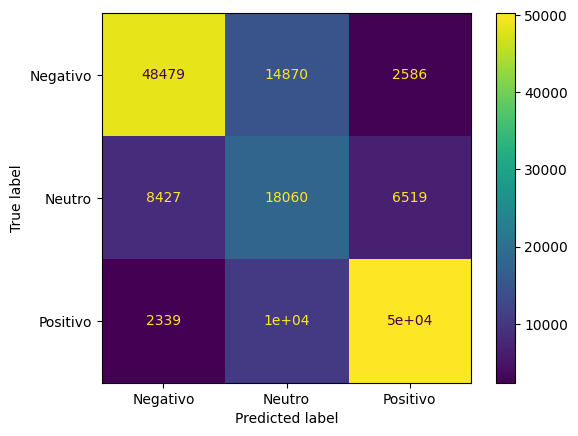

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=modelo.classes_)
disp.plot()
plt.show()

#### Avaliação por métrica adequada (F1-score)
- Em classificação de sentimentos, acurácia isolada não é suficiente.

In [ ]:
from sklearn.metrics import f1_score

f1_macro = f1_score(y_test, y_pred, average='macro')
print(f"F1-score macro: {f1_macro:.4f}")

F1-score macro: 0.6896


- Macro trata todas as classes igualmente
- Essencial se houver desbalanceamento

##### Ajuste fino do modelo (Hiperparâmetros)
- GridSearch simplificado (opcional)

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 5],
    'penalty': ['l2']
}

grid = GridSearchCV(
    LogisticRegression(
        solver='saga',
        max_iter=1000,
        class_weight='balanced',
        multi_class='multinomial',
        random_state=42
    ),
    param_grid,
    scoring='f1_macro',
    cv=3,
    n_jobs=-1
)

grid.fit(X_train_tfidf, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


GridSearchCV(cv=3,
             estimator=LogisticRegression(class_weight='balanced',
                                          max_iter=1000,
                                          multi_class='multinomial',
                                          random_state=42, solver='saga'),
             n_jobs=-1, param_grid={'C': [0.1, 1, 5], 'penalty': ['l2']},
             scoring='f1_macro')

##### Melhor modelo

In [ ]:
best_model = grid.best_estimator_
print("Melhores parâmetros:", grid.best_params_)

Melhores parâmetros: {'C': 1, 'penalty': 'l2'}


##### Reavaliar com o melhor modelo

In [ ]:
y_pred_best = best_model.predict(X_test_tfidf)

print(classification_report(y_test, y_pred_best))


              precision    recall  f1-score   support

    Negativo       0.82      0.74      0.77     65935
      Neutro       0.42      0.55      0.47     33006
    Positivo       0.85      0.80      0.82     63028

    accuracy                           0.72    161969
   macro avg       0.69      0.69      0.69    161969
weighted avg       0.75      0.72      0.73    161969



Compare com o modelo baseline:
- Se o ganho for pequeno → mantenha o baseline (mais simples)
- Se o ganho for relevante → use o melhor modelo

##### Validação prática (teste manual)

In [ ]:
def prever_sentimento(texto):
    texto_tfidf = tfidf.transform([texto])
    return best_model.predict(texto_tfidf)[0]

prever_sentimento("The product is amazing and works perfectly")

'Positivo'

Conclusão do Passo
- Modelo avaliado corretamente
- Pontos fortes e fracos identificados
- Possibilidade de otimização validada
- Base sólida para deploy

##### Testando Outros Modelos de Machine Learning
- Não refaça o TF-IDF
 - Usaremos X_train_tfidf e X_test_tfidf já prontos, garantindo que a comparação seja válida.

Modelo 1 — Naive Bayes (MultinomialNB)
Quando usar?
 - Extremamente rápido
 - Muito usado em classificação de texto
 - Ótimo baseline, mas menos expressivo que Logistic/SVM

In [ ]:
# Importar e instanciar
from sklearn.naive_bayes import MultinomialNB
nb_model = MultinomialNB()

##### Treinar o modelo

In [ ]:
nb_model.fit(X_train_tfidf, y_train)

MultinomialNB()

##### Avaliar

In [ ]:
y_pred_nb = nb_model.predict(X_test_tfidf)

from sklearn.metrics import classification_report, accuracy_score

print("Naive Bayes - Acurácia:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

Naive Bayes - Acurácia: 0.7277503719847626
              precision    recall  f1-score   support

    Negativo       0.74      0.86      0.79     65935
      Neutro       0.47      0.22      0.30     33006
    Positivo       0.77      0.86      0.81     63028

    accuracy                           0.73    161969
   macro avg       0.66      0.65      0.64    161969
weighted avg       0.70      0.73      0.70    161969



Expectativa realista
 - Acurácia: média
 - Neutro costuma ter recall baixo
 - Muito rápido (segundos)

#### Modelo 2 — SVM Linear (LinearSVC)
 - Quando usar?
   - Excelente para texto e alta dimensionalidade
   - Costuma performar melhor que Logistic
   - Muito usado em produção

In [ ]:
# Importar e instanciar
from sklearn.svm import LinearSVC

svm_model = LinearSVC(
    class_weight='balanced',
    random_state=42
)

##### Treinar

In [ ]:
svm_model.fit(X_train_tfidf, y_train)

LinearSVC(class_weight='balanced', random_state=42)

##### Avaliar

In [ ]:
y_pred_svm = svm_model.predict(X_test_tfidf)

print("SVM - Acurácia:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

SVM - Acurácia: 0.718736301391007
              precision    recall  f1-score   support

    Negativo       0.77      0.78      0.78     65935
      Neutro       0.42      0.39      0.40     33006
    Positivo       0.81      0.82      0.82     63028

    accuracy                           0.72    161969
   macro avg       0.67      0.67      0.67    161969
weighted avg       0.71      0.72      0.72    161969



#### Comparação direta dos modelos
 - Crie uma tabela-resumo para decisão final:

In [ ]:
import pandas as pd

resultados = pd.DataFrame({
    "Modelo": ["Logistic Regression", "Naive Bayes", "SVM Linear"],
    "Acurácia": [
        accuracy_score(y_test, y_pred),
        accuracy_score(y_test, y_pred_nb),
        accuracy_score(y_test, y_pred_svm)
    ]
})

resultados


,Modelo,Acurácia
0,Logistic Regression,0.721119
1,Naive Bayes,0.727750
2,SVM Linear,0.718668


#### Salvamento do Modelo e do Vetorizador
 - Por que salvar separadamente?

Em NLP:
  - TF-IDF aprende o vocabulário
  - Modelo (SVM) aprende os pesos
  - ⚠️ Se salvar apenas o modelo, a API não funcionará.

##### Importar biblioteca de persistência

In [ ]:
import joblib

- Criar pasta para os artefatos do modelo

In [ ]:
import os

os.makedirs("models", exist_ok=True)


##### Salvar o TF-IDF
- Vocabulário
- Pesos IDF
- Configuração completa

In [ ]:
joblib.dump(tfidf, "models/tfidf.pkl")

['models/tfidf.pkl']

##### Salvar o modelo SVM
- Pesos do classificador
- Configuração final
- Classes aprendidas

In [ ]:
joblib.dump(svm_model, "models/svm_sentiment_model.pkl")

['models/svm_sentiment_model.pkl']

##### Testar o carregamento (passo CRÍTICO)

In [ ]:
tfidf_loaded = joblib.load("models/tfidf.pkl")
model_loaded = joblib.load("models/svm_sentiment_model.pkl")


##### Criar função de inferência (simulação da API)

In [ ]:
def prever_sentimento(texto):
    texto_tfidf = tfidf_loaded.transform([texto])
    return model_loaded.predict(texto_tfidf)[0]


##### Teste final

In [ ]:
prever_sentimento("The product is terrible and stopped working in one week")

'Negativo'

Conclusão

- Modelo salvo corretamente
- Vetorizador salvo corretamente
- Teste de carregamento validado
- Pronto para produção